## 9주

### * 원-핫-인코딩(가변수)과 숫자로 표현된 범주형 특성
- 원-핫-인코딩(on out of encoding) = 가변수

#### * 범주형 변수
- 범주형 변수에서 범주형 특성과 연속형 특성의 차이는 입력기준이다.
- 저장공간 절약이 목적이거나 취합 방식에 따라 숫자로 인코딩 된 숫자로 표현된 범주형 특성이다
- 특정 애플리케이션에 가장 적합한 표현을 찾는 특성 공학이다.
- 데이터 표현 형태가 머신러닝 모델의 성능에 큰 영향을 주는 학습 방향이다. 

In [8]:
# 원-핫-인코딩(가변수)과 숫자로 표현된 범주형 특성 실습
import os
import mglearn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation',
                         'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [9]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [11]:
print("원본 특성: \n", list(data.columns), "\n")

data_dummies = pd.get_dummies(data)

print("get_dummies 후의 특성: \n", list(data_dummies.columns), "\n")

display(data_dummies.head())

원본 특성: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

X = features.values
y = data_dummies['income_ <=50K'].values

print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression(solver='lbfgs', max_iter=5000)
logreg.fit(X_train, y_train)

print("테스트 점수 : {:.2f}".format(logreg.score(X_train, y_train)))

테스트 점수 : 0.81


In [17]:
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1], '범주형 특성':['양말', '여우', '양말', '상자']})

display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [18]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [19]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)

display(pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


# 　

### * 구간 분할(이산화), 선형 및 트리모델
- 데이터 특성 표현 중 하나
- 구간 분할(bining) 또는 이산화 : 연속형 데이터에 아주 강력한 선형 모델을 만드는 방법, 하나의 연속형 특성을 구간을 나누어 여러 개의 범주형 특성으로 분할
- 데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미 뿐 아니라 어떤 모델을 사용 방법에 따라 달라진다.
- 선형 모델과 트리 기반 모델(결정 트리, 그레이디언트, 부스팅 트리, 랜덤 포레스트 등)은 특성의 표현 방식으로 미치는 영향이 매우 다르다.
- 용량이 매우 크고 고차원 데이터셋이라 선형모델을 사용해야 할 경우 구간 분할이 모델 성능 향상에 도움이 된다.
- 커널 기법은 데이터를 다른 특징 공간에 옮긴 후 선형 회귀 하는 것이다.
- 구간의 경계를 정의 : 균일한 너비로 하거나 데이터 분위를 사용한다.

#### * 상호작용과 다항식
- 원본 데이터에 상호작용과 다항식을 추가하여 특성을 풍부하게 표현한다.
- 커널 기법

#### * 일변량 비선형 변환
- Log와 exp 함수 : 데이터의 스케일을 변경하여 선형 모델과 신경망의 성능을 향상시킨다.

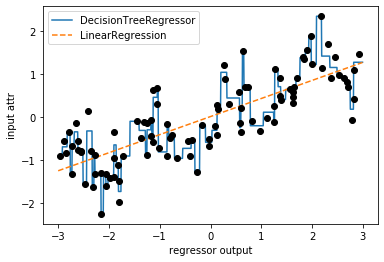

In [21]:
# 다양한 데이터 표현 실습

import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="DecisionTreeRegressor")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="LinearRegression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.legend(loc='best')
plt.show()

# 데이터의 표현 형태에 따라서 달라진다.
# 연속형 데이터에서 가장 강력한 선형 모델을 만드는 방법
# -> 하나의 특성을 여러 특성으로 구분
# => 구간 분할(이산화)

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges:\n", kb.bin_edges_)

bin edges:
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [25]:
X_binned = kb.transform(X) # 각 데이터 포인트를 해당되는 구간으로 인코딩

# 기본적으로 KBinsDicretizer : 원핫인코딩
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [26]:
# 희소행렬을 밀집 배열로 변환해서 원본 데이터 포인트와 인코딩 결과 비교
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [28]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44480 missing from current f

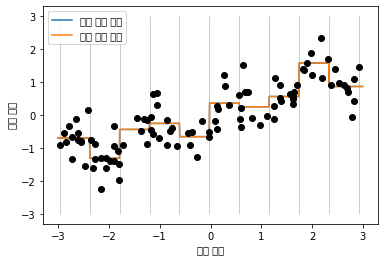

In [29]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg=DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.xlabel("회귀 출력")
plt.ylabel("입력 특성")

plt.show()
# 구간으로 나누어진 특성에 적용한 선형 회귀와 결정 트리 회귀
# 이 모델이 예측한 값이 상수값
# 선형 회귀의 경우, 구간 분할 후 유연
# 결정 트리의 경우, 구간 분할 수 유연성이 나아졌다.

(100, 11)


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44480 missing from current f

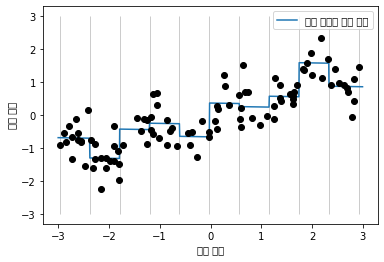

In [31]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.xlabel("회귀 출력")
plt.ylabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')

(100, 20)


NameError: name 'bins' is not defined

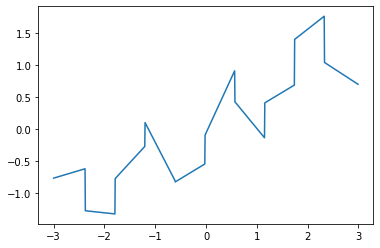

In [32]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

line_combined = np.hstack([line, line_binned])
X_product = np.hstack([X_binned, X*X_binned])

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
    
plt.xlabel("회귀 출력")
plt.ylabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc='best')

In [34]:
from sklearn.preprocessing import PolynomialFeatures

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape: {}".format(X_poly.shape))
print("X 원소: \n {}".format(X[:5]))
print("X_poly 원소: \n {}".format(X_poly[:5]))

print("항 이름: \n {}".format(poly.get_feature_names()))

X_poly.shape: (100, 10)
X 원소: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소: 
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]
항 이름: 
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^

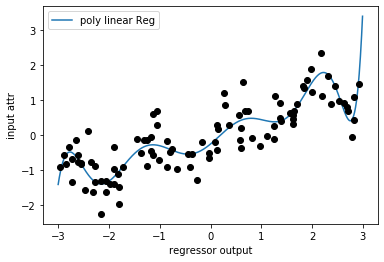

In [35]:
from sklearn.preprocessing import PolynomialFeatures

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='poly linear Reg')
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.legend(loc='best')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47141 missing from current f

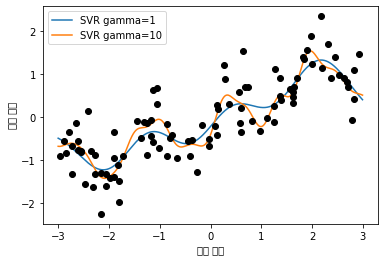

In [36]:
from sklearn.svm import SVR

for gamma in[1, 10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc='best')

# 　

### * 특성 자동 선택
- 새로운 특성을 추가할 때나 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 나머지는 무시하거나 조절해서 특성의 수를 줄이는 것이 좋다.
- 특성이 추가되면 모델은 더 복잡해지고 과대적합 될 가능성도 높아진다. 따라서 특성을 제어해야하는 대표적인 방법으로 자동 특성 선택이 있다.

#### * 일변량 통계
- 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산하고, 깊게 관련되어 있다고 판단되는 특성을 선택한다.
- 일변량 통계의 핵심 요소는 일변량, 각 특성이 독립적으로 평가된다는 것이다.
- 다른 특성과 깊게 연관된 특성은 선택하지 않으므로 계산이 매우 빠르고 평가를 위해 모델을 만들 필요가 없다
- 특성을 선택한 후 적용하려는 모델에 상관없이 사용이 가능하다.
- 분산분석 : 데이터를 클래스별로 나누어 평균을 비교하는 방법이다. 분산분석으로 계산한 어떤 특성의 F-값이 높으면 그 특성은 클래스별 평균이 서로 다르다는 뜻이다.

In [37]:
# 전문가 지식 활용 예제

# 특성 자동 선택
# => 어떤 특성이 좋은 것인지 구분이 관건

# 일변량 통계, 모델 기반 선택, 반복적 선택 -> 지도 학습
# 일변량 통계 : 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산(=분산분석)
# 일변량 : 각 특성이 독립적으로 평가된다

import matplotlib.pyplot as plt
import platform
from sklearn.datasets import load_breast_cancer 
from sklearn.feature_selection import SelectPercentile, f_classif
import numpy as np

cancer=load_breast_cancer()

# 고정된 난수 발생
rng = np.random.RandomState(42)

# 데이터에 노이즈 특성 추가
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print("X_train.shape : ", X_train.shape)
print("X_train_selected.shape : ", X_train_selected.shape)

X_train.shape :  (284, 80)
X_train_selected.shape :  (284, 40)


In [38]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0xec70024d48>],
 <a list of 1 Text yticklabel objects>)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current f

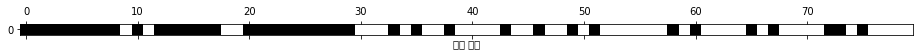

In [40]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [42]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수 : {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수 : {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수 : 0.951
선택된 일부 특성을 사용한 점수 : 0.933


In [44]:
# 모델 기반 특성 선택
# 지도 학습 머신러닝 모델을 사용해서 특성의 중요도 평가 
# -> 가장 중요한 특성만 선택
# => 중요도를 측정할 요소 필요

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [45]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

print("X_train.shape", X_train.shape)
print("X_train_l1.shape", X_train_l1.shape)

X_train.shape (284, 80)
X_train_l1.shape (284, 40)


([<matplotlib.axis.YTick at 0xec716253c8>],
 <a list of 1 Text yticklabel objects>)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current f

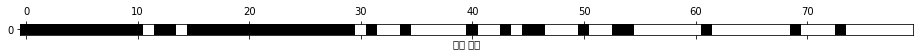

In [46]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [51]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=3000).fit(X_train_l1, y_train).score(X_test_l1, y_test)

print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.358


([<matplotlib.axis.YTick at 0xec7176fe48>],
 <a list of 1 Text yticklabel objects>)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current f

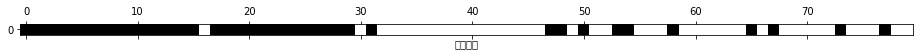

In [52]:
# 반복적 특성 선택
# 특성의 수가 각기 다른 일련의 모델이 생성

from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성번호")
plt.yticks([0])

In [53]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression(max_iter=3000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.940
